In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
ncaa_data = pd.read_csv("./data/MNCAATourneyDetailedResults.csv")

In [3]:
ncaa_data.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [4]:
ncaa_data.shape

(1315, 34)

In [5]:
all_data = pd.read_csv("./data/MRegularSeasonDetailedResults.csv")

In [6]:
all_data.shape, all_data.columns

((112504, 34),
 Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
        'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
        'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
        'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
       dtype='object'))

In [7]:
all_data.Season.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype=int64)

In [8]:
training_data = all_data[all_data.Season != 2024]
test_data = all_data[all_data.Season == 2024]

In [9]:
winning_team = training_data[['WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 
                         'WStl', 'WBlk', 'WPF']]
losing_team = training_data[['LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 
                        'LStl', 'LBlk', 'LPF']]

winning_team_test = test_data[['WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 
                         'WStl', 'WBlk', 'WPF']]
losing_team_test = test_data[['LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 
                        'LStl', 'LBlk', 'LPF']]

In [10]:
winning_team.rename(columns= lambda x: x[1:], inplace=True)
winning_team['target'] = 1
losing_team.rename(columns = lambda x: x[1:], inplace=True)
losing_team['target'] = 0

winning_team_test.rename(columns=lambda x: x[1:], inplace=True)
winning_team_test['target'] = 1
losing_team_test.rename(columns=lambda x: x[1:], inplace=True)
losing_team_test['target'] = 0

In [11]:
data_train = pd.concat([winning_team, losing_team])
data_train = data_train.sample(frac=1).reset_index()
data_train.drop(columns=['index'], inplace=True)

data_test = pd.concat([winning_team_test, losing_team_test])
data_test = data_test.sample(frac=1).reset_index()
data_test.drop(columns=['index'], inplace=True)

In [12]:
data_test

,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,target
0,35,61,6,16,20,21,6,24,13,4,4,4,15,1
1,28,73,6,36,13,24,14,23,12,12,5,0,26,0
2,28,66,9,26,8,19,14,24,10,14,6,3,16,0
3,26,57,9,20,16,17,5,23,12,5,11,4,13,1
4,26,52,6,20,7,11,10,21,10,18,5,5,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9735,23,54,6,16,12,17,4,20,11,11,8,4,14,0
9736,25,67,8,27,8,17,11,27,15,10,7,3,16,1
9737,30,62,9,20,3,6,6,19,20,14,12,7,13,1
9738,29,59,11,28,10,12,8,18,20,9,4,2,19,0


In [13]:
data_train.columns

Index(['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO',
       'Stl', 'Blk', 'PF', 'target'],
      dtype='object')

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from tensorflow.keras.utils import to_categorical

In [15]:
X = data_train[['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO',
       'Stl', 'Blk', 'PF']]
y = data_train.target

In [16]:
min_max_scaler = RobustScaler()
# X_train = min_max_scaler.fit_transform(X)
y_train = to_categorical(y)
X_train = X

In [17]:
X = data_test[['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO',
       'Stl', 'Blk', 'PF']]
y = data_test.target

In [18]:
min_max_scaler = RobustScaler()
# X_test = min_max_scaler.fit_transform(X)
y_test = to_categorical(y)
X_test = X

In [19]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [21]:
earlyStop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
adam = Adam(learning_rate=5e-8)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                        

In [22]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.3, callbacks=[earlyStop])

Epoch 1/50
9418/9418 [==============================] - 13s 1ms/step - loss: 0.3294 - acc: 0.8564 - val_loss: 0.2845 - val_acc: 0.8777
Epoch 2/50
9418/9418 [==============================] - 12s 1ms/step - loss: 0.3150 - acc: 0.8650 - val_loss: 0.2867 - val_acc: 0.8783
Epoch 3/50
9418/9418 [==============================] - 11s 1ms/step - loss: 0.3063 - acc: 0.8679 - val_loss: 0.2874 - val_acc: 0.8777
Epoch 4/50
9418/9418 [==============================] - 12s 1ms/step - loss: 0.3018 - acc: 0.8690 - val_loss: 0.2909 - val_acc: 0.8786


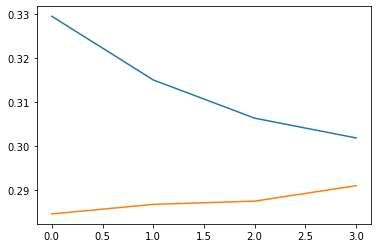

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

### testing

In [24]:
y_true_winners = winning_team_test.iloc[:,-1]
y_true_losers = losing_team_test.iloc[:,-1]
X_true_winners = winning_team_test.iloc[:,:-1]
X_true_losers = losing_team_test.iloc[:,:-1]

In [25]:
min_max_scaler_test = RobustScaler()

In [26]:
# X_true_winners = min_max_scaler_test.fit_transform(X_true_winners)
# X_true_losers = min_max_scaler_test.fit_transform(X_true_losers)

In [27]:
winners_predict = model.predict(X_true_winners)
losers_predict = model.predict(X_true_losers)
# winners_predict = model.predict(average_stats_past_year_winners)
# losers_predict = model.predict(average_stats_past_year_losers)

153/153 [==============================] - 0s 629us/step


In [28]:
winners_predict = np.argmax(winners_predict, axis=1)
losers_predict = np.argmax(losers_predict, axis=1)

In [29]:
count = 0
for x, y in zip(winners_predict, losers_predict):
#     print(x,y)
    if x==1 and y==0:
        count += 1
print(f"The accuracy is: {(float(count)/len(winners_predict))*100.0}%")

The accuracy is: 78.39835728952772%


## Results

All these results are when we know the values of different fields of the teams.

1. With MinMaxScaler the accuracy for the results of 2024 regular season is `22.80%`
2. With StandardScaler the accuracy for the results of 2024 regular season is `31.08%`
3. With RobustScaler the accuracy for the results of 2024 regular season is `30.74%`
4. With no normalisation the accuracy for the results of 2024 regular season is `78.18%`


In [30]:
model.save("./data/past_points_average.keras")

# Checkpoint 1

In [31]:
ncaa_final_winners = pd.read_csv("./data/ncaa_finals.csv")
ncaa_final_winners.head(3)

,winnersId,losersId
0,1393,1242
1,1163,1210
2,1314,1228


In [32]:
test_data_winningIds = test_data.WTeamID
test_data_losingIds = test_data.LTeamID
test_data_tmp_df = pd.DataFrame({'winnersId': test_data_winningIds, 'losersId': test_data_losingIds})
all_win_lose_combination = pd.concat([ncaa_final_winners, test_data_tmp_df])
all_win_lose_combination

,winnersId,losersId
0,1393,1242
1,1163,1210
2,1314,1228
3,1196,1417
4,1196,1326
...,...,...
112499,1454,1237
112500,1455,1412
112501,1459,1359
112502,1462,1177


In [33]:
from tqdm import tqdm

In [34]:
# can use dictionary here

average_stats_past_year_winners = []
average_stats_past_year_losers = []
for winnerId in tqdm(all_win_lose_combination.winnersId):
    df_tmp_win = all_data[(all_data.WTeamID == winnerId) & (all_data.Season == 2023)]
    df_tmp_win = df_tmp_win[['WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 
                         'WStl', 'WBlk', 'WPF']]
    
#     df_tmp_lose = all_data[(all_data.LTeamID == winnerId) & (all_data.Season == 2023)]
#     df_tmp_lose = df_tmp_lose[['LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 
#                         'LStl', 'LBlk', 'LPF']]
    win_values = df_tmp_win.describe().mean().values
#     lose_values = df_tmp_lose.describe().mean().values
#     average_stats = (win_values + lose_values)/2.0
#     average_stats_past_year_winners.append(average_stats)
    average_stats_past_year_winners.append(win_values)
    
for loserId in tqdm(all_win_lose_combination.losersId):
    df_tmp_win = all_data[(all_data.WTeamID == loserId) & (all_data.Season == 2023)]
    df_tmp_win = df_tmp_win[['WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 
                         'WStl', 'WBlk', 'WPF']]
    
#     df_tmp_lose = all_data[(all_data.LTeamID == loserId) & (all_data.Season == 2023)]
#     df_tmp_lose = df_tmp_lose[['LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 
#                         'LStl', 'LBlk', 'LPF']]
    win_values = df_tmp_win.describe().mean().values
#     lose_values = df_tmp_lose.describe().mean().values
#     average_stats = (win_values + lose_values)/2.0
#     average_stats_past_year_losers.append(average_stats)
    average_stats_past_year_losers.append(win_values)

100%|██████████| 4890/4890 [00:59<00:00, 82.27it/s]


In [35]:
average_stats_past_year_winners = np.array(average_stats_past_year_winners)
average_stats_past_year_losers = np.array(average_stats_past_year_losers)

In [36]:
prediction = []
for winner, loser in tqdm(zip(average_stats_past_year_winners, average_stats_past_year_losers)):
    winner = winner - loser
    prediction.append(np.argmax(model.predict(np.reshape(winner, (1,13)), verbose=False)))

4890it [03:55, 20.81it/s]


In [37]:
(sum(prediction)/len(prediction))*100

59.71370143149284

# Checkpoint 2

In [38]:
# implementing RandomForest

from sklearn.ensemble import RandomForestClassifier

In [39]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
winners_predict_rf = clf.predict(average_stats_past_year_winners)
losers_predict_rf = clf.predict(average_stats_past_year_losers)

In [41]:
winners_predict_rf = np.argmax(winners_predict_rf, axis=1)
losers_predict_rf = np.argmax(losers_predict_rf, axis=1)

In [42]:
count = 0
for x, y in zip(winners_predict_rf, losers_predict_rf):
    if x==1 and y==0:
        count += 1
print(f"The accuracy is: {(float(count)/len(winners_predict))*100.0}% for Random Forest")

The accuracy is: 6.981519507186857% for Random Forest
